In [1]:
%matplotlib inline

import pandas as pd
import sklearn
import numpy
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = (15,7)

from numpy import *
from scipy.signal import decimate
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, pandas
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)
from scipy.io import wavfile

from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_similarity_score

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filename = 'am.wav'

y, sr = librosa.load(filename)

In [3]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

zcr = librosa.feature.zero_crossing_rate(y)
zcr_avg = numpy.average(zcr)
#print zcr_avg

cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent_avg = numpy.average(cent)
#print cent_avg

mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc_avg = numpy.average(mfcc)
#print mfcc_avg

S = numpy.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
contrast_avg = numpy.average(contrast)
#print contrast_avg

rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff_avg = numpy.average(rolloff)
#print rolloff_avg

bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
bandwidth_avg = numpy.average(bandwidth)
#print bandwidth_avg

rmse = librosa.feature.rmse(y=y)
rmse_avg  = numpy.average(rmse)
print rmse_avg

0.0734518


In [4]:
countLine = 0
with open("all.txt") as f:
    for i, l in enumerate(f):
        countLine = i

countLine = countLine + 1
songName = filename.split(".")[0]

add = str(countLine) + ',' + filename + ',' + str(mfcc_avg) + "," + str(cent_avg) +"," + str(contrast_avg) +"," +str(rolloff_avg) +"," +str(bandwidth_avg) + "," + str(tempo) + ", " + str(rmse_avg)


checkValid = True

with open("all.txt") as f:
    for i, l in enumerate(f):
        if l.split(",")[1] == filename:
            checkValid = False

with open("all.txt", "a") as myfile:
    if checkValid == True:
        myfile.write('\n' +add)

myfile.close()

    
    
df = pd.read_csv('all.txt', header=None, low_memory=False)
x = numpy.asarray(df.loc[1:, 3:4])  # x = numpy.asarray(df.loc[1:,3:6])

y = numpy.asarray(df.loc[1:, 2:2])  # recommandatons based on mfcc
labels = numpy.asarray(df.loc[:0, ])  # label scem-sbwm

# print y
# print x
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max_scaler.fit_transform(x)

# print features_scaled
ours = features_scaled[len(features_scaled) -1]
# print ours


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


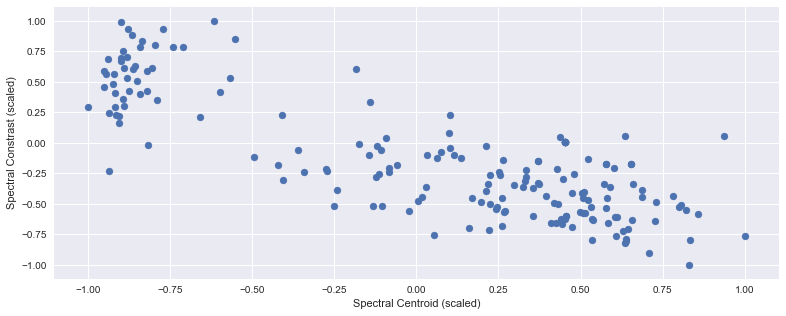

In [5]:
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Spectral Centroid (scaled)')
plt.ylabel('Spectral Constrast (scaled)')

In [6]:
model = sklearn.cluster.KMeans(n_clusters =8, random_state = 1)
labels = model.fit_predict(features_scaled)
print labels

[5 3 7 3 0 7 7 0 7 6 7 0 0 0 0 0 5 5 7 0 0 7 5 0 5 5 0 0 0 7 7 5 0 0 5 0 5
 2 0 0 0 0 5 5 0 5 3 7 3 1 1 1 4 4 4 1 4 4 1 4 1 1 1 1 1 1 1 4 1 1 1 4 4 1
 1 1 1 4 4 1 1 1 1 1 4 4 4 4 4 1 4 1 4 0 7 0 5 5 5 0 7 7 7 7 0 7 7 7 0 0 7
 5 0 5 7 5 7 5 7 0 7 0 2 3 5 5 2 5 5 6 6 6 2 2 7 6 2 6 6 7 2 2 6 2 2 4 2 3
 2 2 2 6 6 6 2 7 2 3 6 2 2 3 7 3 0 5 7 2 6 6 6 6 2 6 3 3 3 3 3 3 3 3 3 1]


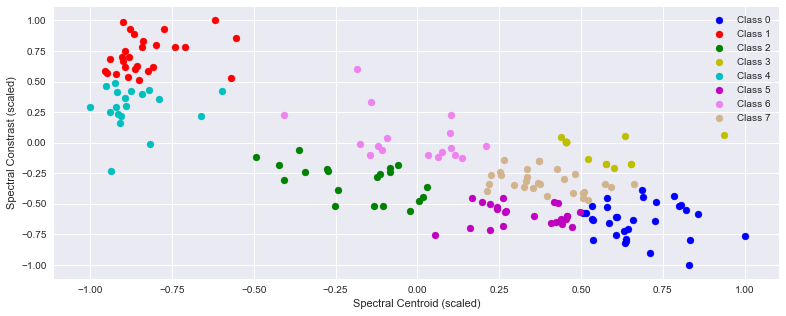

In [7]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels == 6, 0], features_scaled[labels == 6, 1], c='violet')
plt.scatter(features_scaled[labels == 7, 0], features_scaled[labels == 7, 1], c='tan')
plt.xlabel('Spectral Centroid (scaled)')
plt.ylabel('Spectral Constrast (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7'))

[49, 50, 51, 55, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 74, 75, 76, 79, 80, 81, 82, 83, 89, 91, 183]


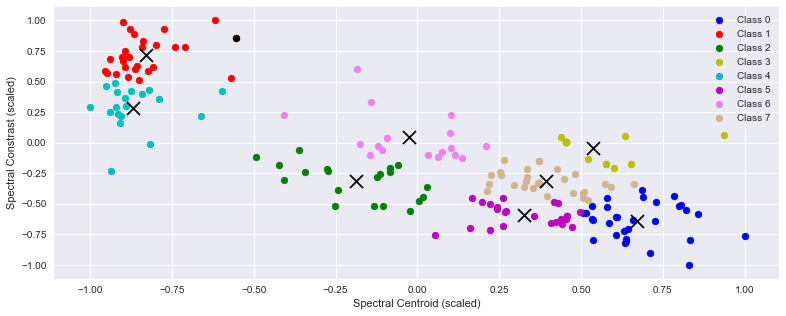

In [8]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='g')
plt.scatter(features_scaled[labels==3,0], features_scaled[labels==3,1], c='y')
plt.scatter(features_scaled[labels==4,0], features_scaled[labels==4,1], c='c')
plt.scatter(features_scaled[labels==5,0], features_scaled[labels==5,1], c='m')
plt.scatter(features_scaled[labels == 6, 0], features_scaled[labels == 6, 1], c='violet')
plt.scatter(features_scaled[labels == 7, 0], features_scaled[labels == 7, 1], c='tan')


for x in numpy.array(features_scaled):
    if(numpy.array_equal(x,ours) == True):
        plt.scatter(x[0], x[1], c='k')

centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
        
plt.xlabel('Spectral Centroid (scaled)')
plt.ylabel('Spectral Constrast (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7'))

km_labels = model.labels_
#print km_labels

index = [find[0] for find, value in numpy.ndenumerate(km_labels) if value==labels[len(labels)-1]]
l2 = [int(v) for v in index]
#print l2

print l2
#print model.labels_
iterHold=0 #line number in lines
npLocation = 0 #index in l2
titles = [] #holds titles 

fileOpen = open('all.txt', "r")
lines = fileOpen.readlines()[1:]

for look in lines:
    if npLocation < len(l2):
        if (l2[npLocation] == iterHold):
            splitting = look.split(",")
            titles.append(splitting[1].split(".")[0])
            npLocation = npLocation + 1
            iterHold = iterHold + 1
        else:
            iterHold = iterHold + 1
titlesHold1 = titles

NOW WITH SPECTRAL ROLLOFF AND BANDWIDTH

In [9]:
df = pd.read_csv('all.csv', header = None, low_memory=False)
x = numpy.asarray(df.loc[1:,5:6]) #x = numpy.asarray(df.loc[1:,3:6])

y = numpy.asarray(df.loc[1:,2:2])#recommandatons based on mfcc
labels = numpy.asarray(df.loc[:0,]) #label scem-sbwm

#print labels
#print y
#print x

#print features_scaled

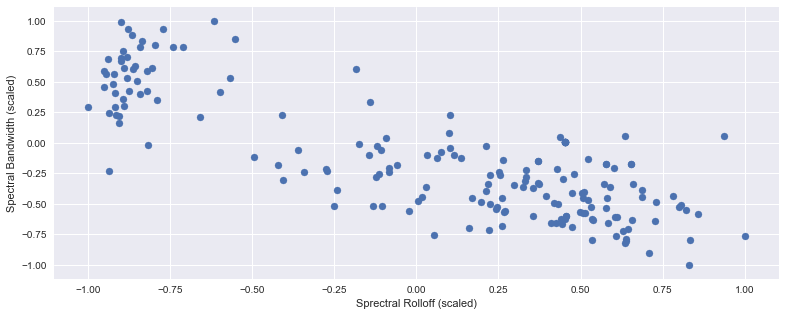

In [12]:
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')

In [ ]:
model = sklearn.cluster.KMeans(n_clusters =8, random_state = 1)
labels = model.fit_predict(features_scaled)

plt.scatter(features_scaled[labels==0,2], features_scaled[labels==0,3], c='b')
plt.scatter(features_scaled[labels==1,2], features_scaled[labels==1,3], c='r') #first 2 elements in here
plt.scatter(features_scaled[labels==2,2], features_scaled[labels==2,3], c='g')
plt.scatter(features_scaled[labels==3,2], features_scaled[labels==3,3], c='y')
plt.scatter(features_scaled[labels==4,2], features_scaled[labels==4,3], c='c')
plt.scatter(features_scaled[labels==5,2], features_scaled[labels==5,3], c='m')
plt.scatter(features_scaled[labels == 6, 2], features_scaled[labels == 6, 3], c='violet')
plt.scatter(features_scaled[labels == 7, 2], features_scaled[labels == 7, 3], c='tan')

plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7'))

In [ ]:
plt.scatter(features_scaled[labels == 0, 2], features_scaled[labels == 0, 3], c='b')
plt.scatter(features_scaled[labels == 1, 2], features_scaled[labels == 1, 3], c='r')  # first 2 elements in here
plt.scatter(features_scaled[labels == 2, 2], features_scaled[labels == 2, 3], c='g')
plt.scatter(features_scaled[labels == 3, 2], features_scaled[labels == 3, 3], c='y')
plt.scatter(features_scaled[labels == 4, 2], features_scaled[labels == 4, 3], c='c')
plt.scatter(features_scaled[labels == 5, 2], features_scaled[labels == 5, 3], c='m')
plt.scatter(features_scaled[labels == 6, 2], features_scaled[labels == 6, 3], c='violet')
plt.scatter(features_scaled[labels == 7, 2], features_scaled[labels == 7, 3], c='tan')

centroids = model.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

for x in numpy.array(features_scaled):
    if (numpy.array_equal(x, ours) == True):
        plt.scatter(x[0], x[1], c='k')

plt.xlabel('Sprectral Rolloff (scaled)')
plt.ylabel('Spectral Bandwidth (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7'))

km_labels = model.labels_
# print km_labels
l2 = []
index = [find[0] for find, value in numpy.ndenumerate(km_labels) if value == labels[len(labels) - 1]]
l2 = [int(v) for v in index]


# print l2
# print model.labels_
iterHold = 0  # line number in lines
npLocation = 0  # index in l2
titles = []  # holds titles

fileOpen = open('all.txt', "r")
lines = fileOpen.readlines()[1:]


for look in lines:
    if npLocation < len(l2):
        if (l2[npLocation] == iterHold):
            splitting = look.split(",")
            titles.append(splitting[1].split('.')[0])
            npLocation = npLocation + 1
            iterHold = iterHold + 1
        else:
            iterHold = iterHold + 1
titlesHold2 = titles

print titlesHold2

In [ ]:
#print numpy.array_equal(['A Milli.mp3', 'Antidote.mp3', 'Bass Drops.mp3', 'Burnin.mp3', 'California Love - Original Mix (Explicit).mp3', 'Champions.mp3', 'Down With The Sickness.mp3', 'Enter Sandman.mp3', 'Feel Invincible.mp3', 'Five Hours.mp3', 'Flashlight - Original Mix.mp3', 'Ima Boss - feat. Rick Ross.mp3', 'Last Resort.mp3', 'Lockjaw.mp3', 'Looking Down the Barrel of Today.mp3', 'My Way.mp3', 'Notorious Thugs - feat. Bone Thugs and Harmony Explicit.mp3', 'One Step Closer.mp3', 'Propaganda.mp3', 'Purple Lamborghini (with Rick Ross).mp3', 'Put On.mp3', 'Smells Like Teen Spirit.mp3', 'The Drop.mp3', 'Wild for the Night.mp3', 'A Milli.mp3', 'Antidote.mp3', 'Aint My Fault.mp3', 'Be As You Are - JordanXL Remix.mp3', 'Blow Your Mind (Mwah).mp3', 'Closer.mp3', 'False Alarm.mp3', 'Final Song.mp3', 'Hymn For The Weekend - Seeb Remix.mp3', 'Into You.mp3', 'Let Me Hold You (Turn Me On).mp3', 'Millionaire (feat. Nelly) - Alan Walker Remix.mp3', 'Perfect Strangers.mp3', 'Something Wrong.mp3', 'Starving.mp3', 'Still Falling For You - Jonas Blue Remix.mp3', 'The Ocean.mp3', 'WILD - Young Bombs Remix.mp3', 'Blues for Sharpie.mp3', 'Love Jumped Out.mp3', 'Mojo.mp3', 'One For Daddy-O.mp3', 'Remember - 1999 Digital Remaster.mp3', 'Sandu.mp3', 'Smoke Stack - 1999 Digital Remaster.mp3', 'So In Love - feat. Anthony Hamilton.mp3', 'MJ3']
 #,['A Milli.mp3', 'Antidote.mp3', 'Bass Drops.mp3', 'Burnin.mp3', 'California Love - Original Mix (Explicit).mp3', 'Champions.mp3', 'Down With The Sickness.mp3', 'Enter Sandman.mp3', 'Feel Invincible.mp3', 'Five Hours.mp3', 'Flashlight - Original Mix.mp3', 'Ima Boss - feat. Rick Ross.mp3', 'Last Resort.mp3', 'Lockjaw.mp3', 'Looking Down the Barrel of Today.mp3', 'My Way.mp3', 'Notorious Thugs - feat. Bone Thugs and Harmony Explicit.mp3', 'One Step Closer.mp3', 'Propaganda.mp3', 'Purple Lamborghini (with Rick Ross).mp3', 'Put On.mp3', 'Smells Like Teen Spirit.mp3', 'The Drop.mp3', 'Wild for the Night.mp3', 'A Milli.mp3', 'Antidote.mp3', 'Aint My Fault.mp3', 'Be As You Are - JordanXL Remix.mp3', 'Blow Your Mind (Mwah).mp3', 'Closer.mp3', 'False Alarm.mp3', 'Final Song.mp3', 'Hymn For The Weekend - Seeb Remix.mp3', 'Into You.mp3', 'Let Me Hold You (Turn Me On).mp3', 'Millionaire (feat. Nelly) - Alan Walker Remix.mp3', 'Perfect Strangers.mp3', 'Something Wrong.mp3', 'Starving.mp3', 'Still Falling For You - Jonas Blue Remix.mp3', 'The Ocean.mp3', 'WILD - Young Bombs Remix.mp3', 'Blues for Sharpie.mp3', 'Love Jumped Out.mp3', 'Mojo.mp3', 'One For Daddy-O.mp3', 'Remember - 1999 Digital Remaster.mp3', 'Sandu.mp3', 'Smoke Stack - 1999 Digital Remaster.mp3', 'So In Love - feat. Anthony Hamilton.mp3', 'MJ3'])
#first parameter is cluster of SS and second is ls

#print numpy.array_equal(["'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Blood On The Leaves.mp3', 'Dirty Deeds Done Dirt Cheap.mp3', 'Forever.mp3', "Grindin'.mp3", 'Hate Me Now.mp3', 'Look Alive - Remix.mp3', 'Lose Yourself - Soundtrack Version.mp3', 'Mercy.1.mp3', 'Panda.mp3', 'Patiently Waiting.mp3', 'POWER.mp3', 'Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit).mp3', 'Rap God.mp3', 'Tempo.mp3', 'Thunderstruck.mp3', 'We Own It (Fast & Furious).mp3', 'Welcome To The Jungle.mp3', "'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Alarm.mp3', 'Body Say.mp3', 'Burn Brighter.mp3', 'Cold Water.mp3', 'CRZY.mp3', 'Dont Let Me Down.mp3', 'Heathens.mp3', 'In the Name of Love.mp3', 'Let Me Love You.mp3', 'Mama Said.mp3', 'My Way.mp3', 'Never Be Like You (feat. Kai).mp3', 'Please Dont Go.mp3', 'Scars To Your Beautiful.mp3', 'Side To Side.mp3', 'This Is What You Came For.mp3', 'Too Good.mp3', 'We Dont Talk Anymore (feat. Selena Gomez).mp3', 'Whole Heart.mp3', 'Almost Like Being in Love.mp3', 'Anniversary - Radio Edit.mp3', 'Cambridge Place.mp3', 'Have You Met Miss Jones.mp3', "Let's Call the Whole Thing Off.mp3", 'Spend The Night.mp3', 'Despacito'],
 #                      ["'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Blood On The Leaves.mp3', 'Dirty Deeds Done Dirt Cheap.mp3', 'Forever.mp3', "Grindin'.mp3", 'Hate Me Now.mp3', 'Look Alive - Remix.mp3', 'Lose Yourself - Soundtrack Version.mp3', 'Mercy.1.mp3', 'Panda.mp3', 'Patiently Waiting.mp3', 'POWER.mp3', 'Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit).mp3', 'Rap God.mp3', 'Tempo.mp3', 'Thunderstruck.mp3', 'We Own It (Fast & Furious).mp3', 'Welcome To The Jungle.mp3', "'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Alarm.mp3', 'Body Say.mp3', 'Burn Brighter.mp3', 'Cold Water.mp3', 'CRZY.mp3', 'Dont Let Me Down.mp3', 'Heathens.mp3', 'In the Name of Love.mp3', 'Let Me Love You.mp3', 'Mama Said.mp3', 'My Way.mp3', 'Never Be Like You (feat. Kai).mp3', 'Please Dont Go.mp3', 'Scars To Your Beautiful.mp3', 'Side To Side.mp3', 'This Is What You Came For.mp3', 'Too Good.mp3', 'We Dont Talk Anymore (feat. Selena Gomez).mp3', 'Whole Heart.mp3', 'Almost Like Being in Love.mp3', 'Anniversary - Radio Edit.mp3', 'Cambridge Place.mp3', 'Have You Met Miss Jones.mp3', "Let's Call the Whole Thing Off.mp3", 'Spend The Night.mp3', 'Despacito'])
    
#print numpy.array_equal([0, 2, 5, 10, 16, 17, 18, 22, 24, 25, 29, 30, 31, 34, 36, 39, 41, 42, 43, 45, 47, 94, 97, 98, 100, 101, 102, 105, 107, 110, 111, 113, 114, 116, 117, 118, 124, 125, 126, 127, 132, 134, 141, 147, 152, 166, 174],
#[0, 2, 5, 10, 16, 17, 18, 22, 24, 25, 29, 30, 31, 34, 36, 39, 41, 42, 43, 45, 47, 94, 97, 98, 100, 101, 102, 105, 107, 110, 111, 113, 114, 116, 117, 118, 124, 125, 126, 127, 132, 134, 141, 147, 152, 166, 174])

In [ ]:
#difference = list(set(["'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Blood On The Leaves.mp3', 'Dirty Deeds Done Dirt Cheap.mp3', 'Forever.mp3', "Grindin'.mp3", 'Hate Me Now.mp3', 'Look Alive - Remix.mp3', 'Lose Yourself - Soundtrack Version.mp3', 'Mercy.1.mp3', 'Panda.mp3', 'Patiently Waiting.mp3', 'POWER.mp3', 'Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit).mp3', 'Rap God.mp3', 'Tempo.mp3', 'Thunderstruck.mp3', 'We Own It (Fast & Furious).mp3', 'Welcome To The Jungle.mp3', "'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Alarm.mp3', 'Body Say.mp3', 'Burn Brighter.mp3', 'Cold Water.mp3', 'CRZY.mp3', 'Dont Let Me Down.mp3', 'Heathens.mp3', 'In the Name of Love.mp3', 'Let Me Love You.mp3', 'Mama Said.mp3', 'My Way.mp3', 'Never Be Like You (feat. Kai).mp3', 'Please Dont Go.mp3', 'Scars To Your Beautiful.mp3', 'Side To Side.mp3', 'This Is What You Came For.mp3', 'Too Good.mp3', 'We Dont Talk Anymore (feat. Selena Gomez).mp3', 'Whole Heart.mp3', 'Almost Like Being in Love.mp3', 'Anniversary - Radio Edit.mp3', 'Cambridge Place.mp3', 'Have You Met Miss Jones.mp3', "Let's Call the Whole Thing Off.mp3", 'Spend The Night.mp3', 'SS']) - set(["'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Blood On The Leaves.mp3', 'Dirty Deeds Done Dirt Cheap.mp3', 'Forever.mp3', "Grindin'.mp3", 'Hate Me Now.mp3', 'Look Alive - Remix.mp3', 'Lose Yourself - Soundtrack Version.mp3', 'Mercy.1.mp3', 'Panda.mp3', 'Patiently Waiting.mp3', 'POWER.mp3', 'Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit).mp3', 'Rap God.mp3', 'Tempo.mp3', 'Thunderstruck.mp3', 'We Own It (Fast & Furious).mp3', 'Welcome To The Jungle.mp3', "'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Alarm.mp3', 'Body Say.mp3', 'Burn Brighter.mp3', 'Cold Water.mp3', 'CRZY.mp3', 'Dont Let Me Down.mp3', 'Heathens.mp3', 'In the Name of Love.mp3', 'Let Me Love You.mp3', 'Mama Said.mp3', 'My Way.mp3', 'Never Be Like You (feat. Kai).mp3', 'Please Dont Go.mp3', 'Scars To Your Beautiful.mp3', 'Side To Side.mp3', 'This Is What You Came For.mp3', 'Too Good.mp3', 'We Dont Talk Anymore (feat. Selena Gomez).mp3', 'Whole Heart.mp3', 'Almost Like Being in Love.mp3', 'Anniversary - Radio Edit.mp3', 'Cambridge Place.mp3', 'Have You Met Miss Jones.mp3', "Let's Call the Whole Thing Off.mp3", 'Spend The Night.mp3', 'Despacito']))
#difference = list(set(['A Milli.mp3', 'Antidote.mp3', 'Bass Drops.mp3', 'Burnin.mp3', 'California Love - Original Mix (Explicit).mp3', 'Champions.mp3', 'Down With The Sickness.mp3', 'Enter Sandman.mp3', 'Feel Invincible.mp3', 'Five Hours.mp3', 'Flashlight - Original Mix.mp3', 'Ima Boss - feat. Rick Ross.mp3', 'Last Resort.mp3', 'Lockjaw.mp3', 'Looking Down the Barrel of Today.mp3', 'My Way.mp3', 'Notorious Thugs - feat. Bone Thugs and Harmony Explicit.mp3', 'One Step Closer.mp3', 'Propaganda.mp3', 'Purple Lamborghini (with Rick Ross).mp3', 'Put On.mp3', 'Smells Like Teen Spirit.mp3', 'The Drop.mp3', 'Wild for the Night.mp3', 'A Milli.mp3', 'Antidote.mp3', 'Aint My Fault.mp3', 'Be As You Are - JordanXL Remix.mp3', 'Blow Your Mind (Mwah).mp3', 'Closer.mp3', 'False Alarm.mp3', 'Final Song.mp3', 'Hymn For The Weekend - Seeb Remix.mp3', 'Into You.mp3', 'Let Me Hold You (Turn Me On).mp3', 'Millionaire (feat. Nelly) - Alan Walker Remix.mp3', 'Perfect Strangers.mp3', 'Something Wrong.mp3', 'Starving.mp3', 'Still Falling For You - Jonas Blue Remix.mp3', 'The Ocean.mp3', 'WILD - Young Bombs Remix.mp3', 'Blues for Sharpie.mp3', 'Love Jumped Out.mp3', 'Mojo.mp3', 'One For Daddy-O.mp3', 'Remember - 1999 Digital Remaster.mp3', 'Sandu.mp3', 'Smoke Stack - 1999 Digital Remaster.mp3', 'So In Love - feat. Anthony Hamilton.mp3', 'MJ3'])-set(["'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Blood On The Leaves.mp3', 'Dirty Deeds Done Dirt Cheap.mp3', 'Forever.mp3', "Grindin'.mp3", 'Hate Me Now.mp3', 'Look Alive - Remix.mp3', 'Lose Yourself - Soundtrack Version.mp3', 'Mercy.1.mp3', 'Panda.mp3', 'Patiently Waiting.mp3', 'POWER.mp3', 'Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit).mp3', 'Rap God.mp3', 'Tempo.mp3', 'Thunderstruck.mp3', 'We Own It (Fast & Furious).mp3', 'Welcome To The Jungle.mp3', "'Till I Collapse.mp3", 'All The Way Up (Remix).mp3', 'Alarm.mp3', 'Body Say.mp3', 'Burn Brighter.mp3', 'Cold Water.mp3', 'CRZY.mp3', 'Dont Let Me Down.mp3', 'Heathens.mp3', 'In the Name of Love.mp3', 'Let Me Love You.mp3', 'Mama Said.mp3', 'My Way.mp3', 'Never Be Like You (feat. Kai).mp3', 'Please Dont Go.mp3', 'Scars To Your Beautiful.mp3', 'Side To Side.mp3', 'This Is What You Came For.mp3', 'Too Good.mp3', 'We Dont Talk Anymore (feat. Selena Gomez).mp3', 'Whole Heart.mp3', 'Almost Like Being in Love.mp3', 'Anniversary - Radio Edit.mp3', 'Cambridge Place.mp3', 'Have You Met Miss Jones.mp3', "Let's Call the Whole Thing Off.mp3", 'Spend The Night.mp3', 'SS']))
#print difference


In [ ]:
print titlesHold1
print titlesHold2

In [ ]:
print "Recommendations: ", len(set(titlesHold1).intersection(set(titlesHold2)))
print set(titlesHold1).intersection(set(titlesHold2))

In [ ]:
#set(['Garden of Delight.mp3', 'All The Joy.mp3', 'New Orleans.mp3', 'Killer Joe.mp3', 'The Outlaw (Rudy Van Gelder Edition) [2007 - Remastered].mp3', 'A Touch Of Silver.mp3', 'Sun Out.mp3', 'Angel (Live).mp3', 'Sponge', '"Baby', 'Begin The Beguine - Alternate Take.mp3', 'Chill Bill REMIX.mp3', 'London Blues.mp3', 'Blue Monk.mp3', 'Write On Me.mp3', 'Cantaloupe Island.mp3', 'Brother Hiroshi.mp3', "Let's Fall In Love.mp3", 'First Began.mp3', 'Keep You in Mind.mp3'])